# Ca2: Markov Decision Processes and Dynamic Programming## Fundamental Concepts of Sequential Decision MakingWelcome to Computer Assignment 2, where we delve into the mathematical foundations of reinforcement learning through Markov Decision Processes (MDPs) and dynamic programming algorithms. This assignment bridges the gap between theoretical concepts and practical implementation, establishing the groundwork for understanding how agents can make optimal decisions in sequential environments.### Learning ObjectivesBy the end of this assignment, you will master:1. **Markov Decision Processes (MDPs)** - Complete understanding of the MDP framework including states, actions, transitions, and rewards2. **Value Functions** - State-value and action-value functions, their computation and interpretation3. **Bellman Equations** - Derivation and application of Bellman optimality equations4. **Dynamic Programming** - Policy evaluation, policy improvement, policy iteration, and value iteration algorithms5. **Q-Learning** - Model-free reinforcement learning through temporal difference methods6. **GridWorld Implementation** - Complete implementation of a grid-based environment for RL experimentation### Prerequisites- Solid understanding of probability theory and basic statistics- Familiarity with Python programming and NumPy- Knowledge of linear algebra fundamentals- Basic calculus concepts (derivatives, expectations)- Completion of CA1 or equivalent RL introduction### RoadmapThis comprehensive assignment follows a structured learning path:- **Section 1**: Theoretical Foundations (RL Framework, MDPs, Value Functions, Bellman Equations)- **Section 2**: Policy Evaluation (Computing value functions for fixed policies)- **Section 3**: Q-Value Functions (Action-value functions and their relationships)- **Section 4**: Policy Iteration (Alternating evaluation and improvement)- **Section 5**: Value Iteration (Direct optimal value computation)- **Section 6**: Q-Learning (Model-free TD learning)- **Section 7**: Parameter Sensitivity Analysis (Discount factors and environment variations)- **Section 8**: Comparative Analysis and Advanced TopicsLet's embark on this mathematical journey through the core principles of reinforcement learning!

In [ ]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict

# Import RL modules
from environments import GridWorld
from agents.policies import RandomPolicy, CustomPolicy
from agents.algorithms import policy_evaluation, compute_q_from_v, compute_v_from_q
from experiments import (
    experiment_policy_comparison, experiment_policy_iteration,
    experiment_value_iteration, experiment_q_learning,
    experiment_discount_factors, experiment_environment_modifications
)

# Set random seeds and plotting style
np.random.seed(42)
random.seed(42)
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ RL environment setup complete")

✓ RL environment setup complete


## Part 1: Theoretical Foundation### 1.1 Reinforcement Learning Framework**Definition:**Reinforcement Learning is a computational approach to learning from interaction. The key elements are:-   **Agent**: The learner and decision maker - the entity that makes choices-   **Environment**: The world the agent interacts with - everything outside the agent-   **State (s)**: Current situation of the agent - describes the current circumstances-   **Action (a)**: Choices available to the agent - decisions that can be made-   **Reward (r)**: Numerical feedback from environment - immediate feedback signal-   **Policy (π)**: Agent's strategy for choosing actions - mapping from states to actions**Real-World Analogy:**Think of RL like learning to drive:-   **Agent** = The driver (you)-   **Environment** = Roads, traffic, weather conditions-   **State** = Current speed, position, traffic around you-   **Actions** = Accelerate, brake, turn left/right-   **Reward** = Positive for safe driving, negative for accidents-   **Policy** = Your driving strategy (cautious, aggressive, etc.)---### 1.2 Markov Decision Process (mdp)**Definition:**An MDP is defined by the tuple (S, A, P, R, γ) where:-   **S**: Set of states - all possible situations the agent can encounter-   **A**: Set of actions - all possible decisions available to the agent-   **P**: Transition probability function P(s'|s,a) - probability of moving to state s' given current state s and action a-   **R**: Reward function R(s,a,s') - immediate reward received for transitioning from s to s' via action a-   **γ**: Discount factor (0 ≤ γ ≤ 1) - determines importance of future rewards**Markov Property:**The future depends only on the current state, not on the history of how we got there. Mathematically:P(S*{t+1} = s' | S*t = s, A*t = a, S*{t-1}, A*{t-1}, ..., S*0, A*0) = P(S*{t+1} = s' | S*t = s, A*t = a)**Intuition:**The current state contains all information needed to make optimal decisions. The past is already "encoded" in the current state.---### 1.3 Value Functions**State-Value Function:**$$V^π(s) = \mathbb{E}*π[G*t | S_t = s]$$**Interpretation:** Expected total reward when starting from state s and following policy π. It answers: "How good is it to be in this state?"**Action-Value Function:**$$Q^π(s,a) = \mathbb{E}*π[G*t | S*t = s, A*t = a]$$**Interpretation:** Expected total reward when taking action a in state s and then following policy π. It answers: "How good is it to take this specific action in this state?"**Return (Cumulative Reward):**

✓ GridWorld created: 16 states, start=(0, 0), goal=(3, 3)


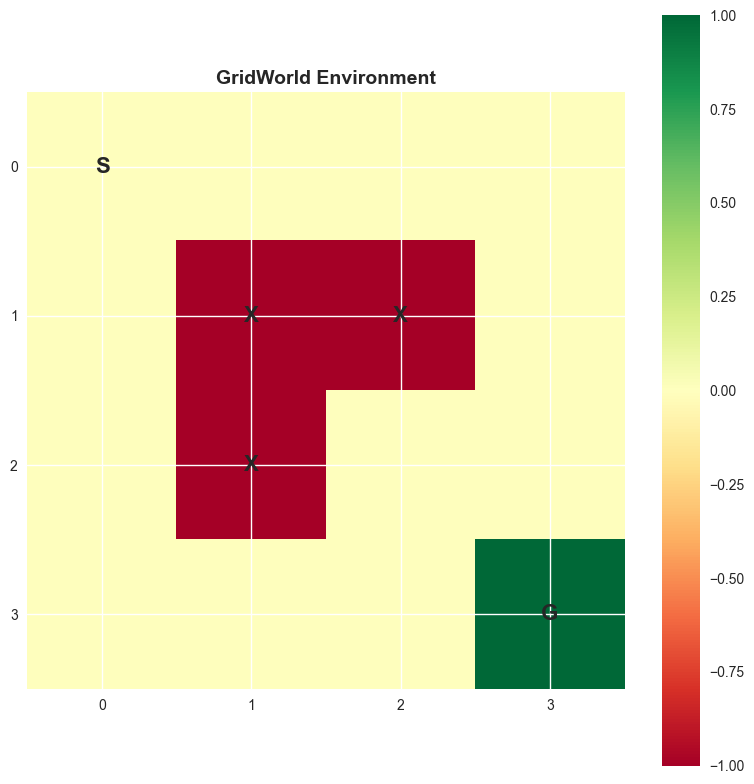

In [2]:
# Create GridWorld environment
env = GridWorld()
print(f"✓ GridWorld created: {len(env.states)} states, start={env.start_state}, goal={env.goal_state}")
env.visualize_grid(title="GridWorld Environment")

## Part 2: Policy Evaluation### 2.1 Random Policy EvaluationLet's start by evaluating a random policy in our GridWorld environment.

In [3]:
# Evaluate random policy
random_policy = RandomPolicy(env)
random_values = policy_evaluation(env, random_policy, gamma=0.9)

print(f"✓ Random policy evaluated - V({env.start_state}) = {random_values[env.start_state]:.3f}")
plot_value_function(env, random_values, "Random Policy Value Function")

Policy evaluation converged after 39 iterations
✓ Random policy evaluated - V((0, 0)) = -3.141


NameError: name 'plot_value_function' is not defined

### 2.2 Custom Policy EvaluationNow let's evaluate a custom policy that prefers moving right and down.

Policy evaluation converged after 111 iterations
✓ Custom policy evaluated - V((0, 0)) = -1.000


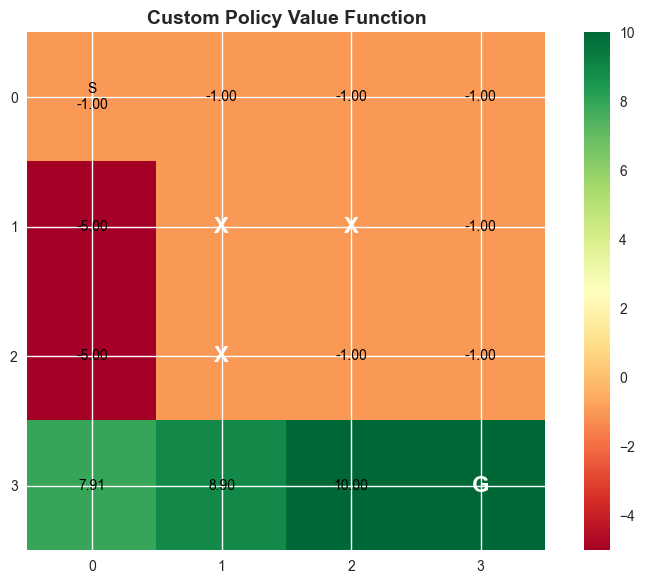

In [ ]:
# Evaluate custom policy
custom_policy = CustomPolicy(env)
custom_values = policy_evaluation(env, custom_policy, gamma=0.9)

print(f"✓ Custom policy evaluated - V({env.start_state}) = {custom_values[env.start_state]:.3f}")
plot_value_function(env, custom_values, "Custom Policy Value Function")

### 2.3 Policy ComparisonLet's compare different policies side by side.

=== Experiment: Policy Comparison ===
Policy evaluation converged after 111 iterations
Policy evaluation converged after 39 iterations
Policy evaluation converged after 111 iterations
Policy evaluation converged after 111 iterations


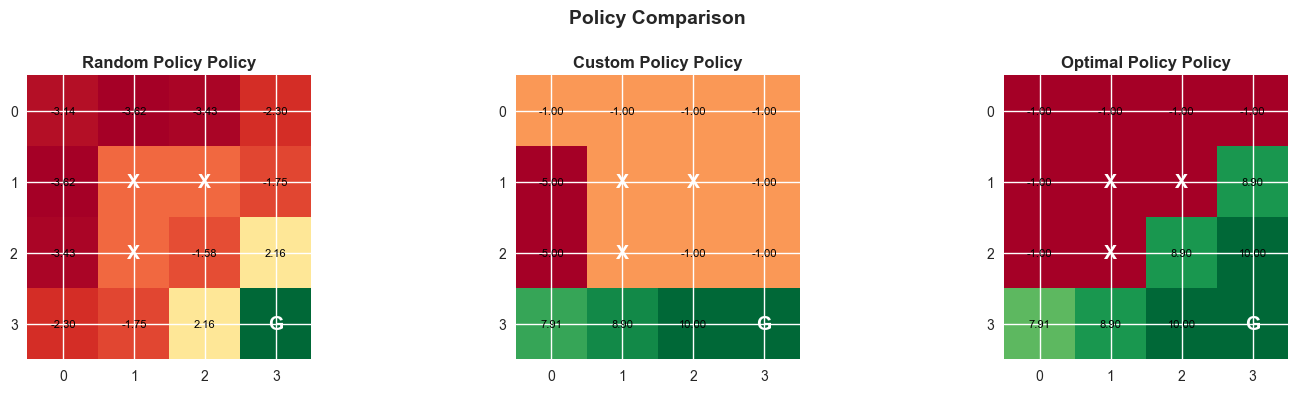

Policy evaluation converged after 39 iterations
Random Policy: Start state value = -3.141
Policy evaluation converged after 111 iterations
Custom Policy: Start state value = -1.000
Policy evaluation converged after 111 iterations
Optimal Policy: Start state value = -1.000


In [ ]:
# Run policy comparison experiment
experiment_policy_comparison(env, gamma=0.9)

## Part 3: Q-value Functions### 3.1 Computing Q-values from V-valuesLet's compute Q-values from the value function of our custom policy.

In [4]:
# Compute Q-values from V-values
Q_from_V = compute_q_from_v(env, custom_values, gamma=0.9)

print("✓ Q-values computed from custom policy V-values")
# Show sample Q-values for key states
for state in [(0,0), (1,0), (2,2)]:
    print(f"State {state}: {[(a, Q_from_V[(state, a)]) for a in env.get_valid_actions(state)]}")

plot_q_values(env, Q_from_V, "Q-Values from Custom Policy")

NameError: name 'custom_values' is not defined

### 3.2 Computing V-values from Q-valuesNow let's do the reverse - compute V-values from Q-values.

In [5]:
# Compute V-values from Q-values
V_from_Q = compute_v_from_q(Q_from_V, env)

print("✓ V-values computed from Q-values")
# Verify consistency
max_diff = max(abs(custom_values[s] - V_from_Q[s]) for s in env.states
               if s not in env.obstacles and s != env.goal_state)
print(f"✓ Max difference between original and computed V: {max_diff:.6f}")

plot_value_function(env, V_from_Q, "V-Values from Q-Values")

NameError: name 'Q_from_V' is not defined

## Part 4: Policy Iteration### 4.1 Running Policy IterationLet's run the policy iteration algorithm to find the optimal policy.

=== Experiment: Policy Iteration ===
Policy Iteration - Iteration 1
Policy evaluation converged after 39 iterations
Policy Iteration - Iteration 2
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 3
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 4
Policy evaluation converged after 7 iterations
Policy iteration converged after 4 iterations

Policy iteration completed in 4 iterations
Final value of start state: 5.495


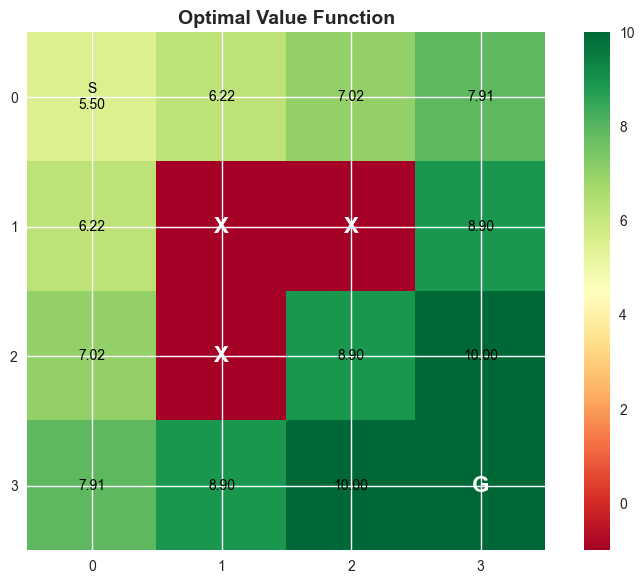

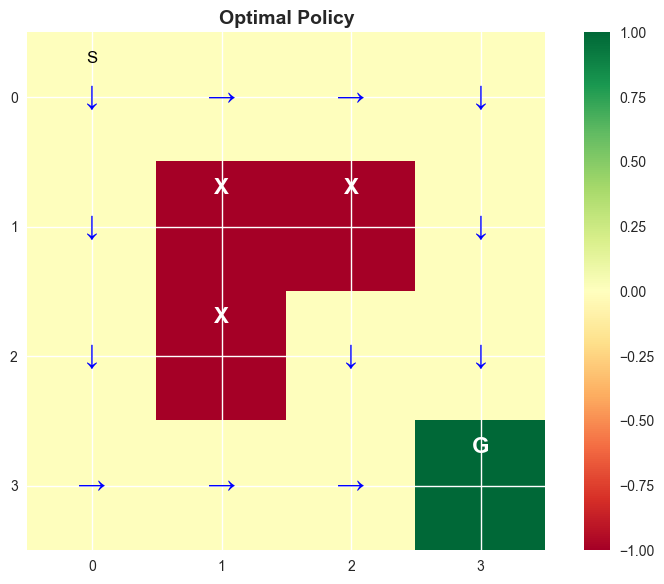

✓ Policy Iteration converged - V((0, 0)) = 5.495


In [6]:
# Run Policy Iteration
optimal_policy, optimal_values, _ = experiment_policy_iteration(env, gamma=0.9)
print(f"✓ Policy Iteration converged - V({env.start_state}) = {optimal_values[env.start_state]:.3f}")

## Part 5: Value Iteration### 5.1 Running Value IterationNow let's run value iteration to find the optimal value function.

=== Experiment: Value Iteration ===
Value iteration converged after 7 iterations

Value iteration completed in 7 iterations
Final value of start state: 5.495


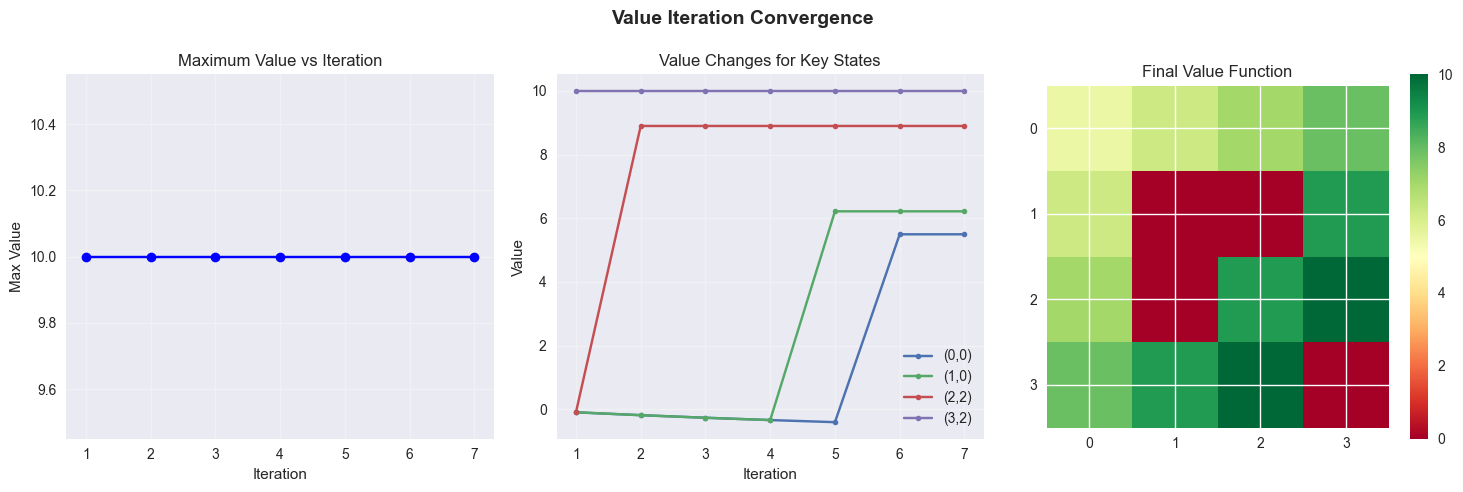

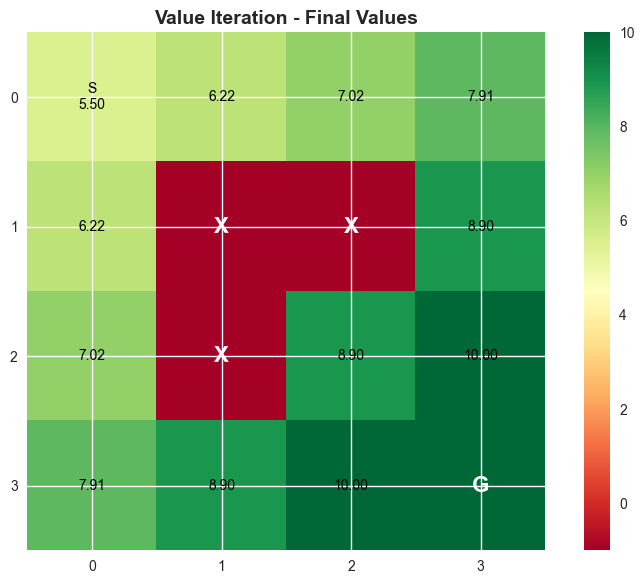

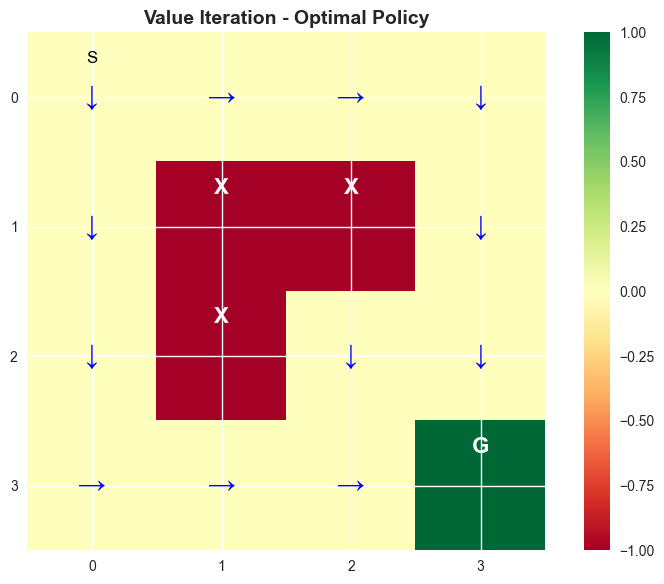

✓ Value Iteration converged - V((0, 0)) = 5.495


In [7]:
# Run Value Iteration
optimal_values_vi, optimal_policy_vi, _ = experiment_value_iteration(env, gamma=0.9)
print(f"✓ Value Iteration converged - V({env.start_state}) = {optimal_values_vi[env.start_state]:.3f}")

## Part 6: Q-learning### 6.1 Running Q-learningLet's train an agent using Q-learning.

=== Experiment: Q-Learning ===
Q-learning completed with 1000 episodes
.3f


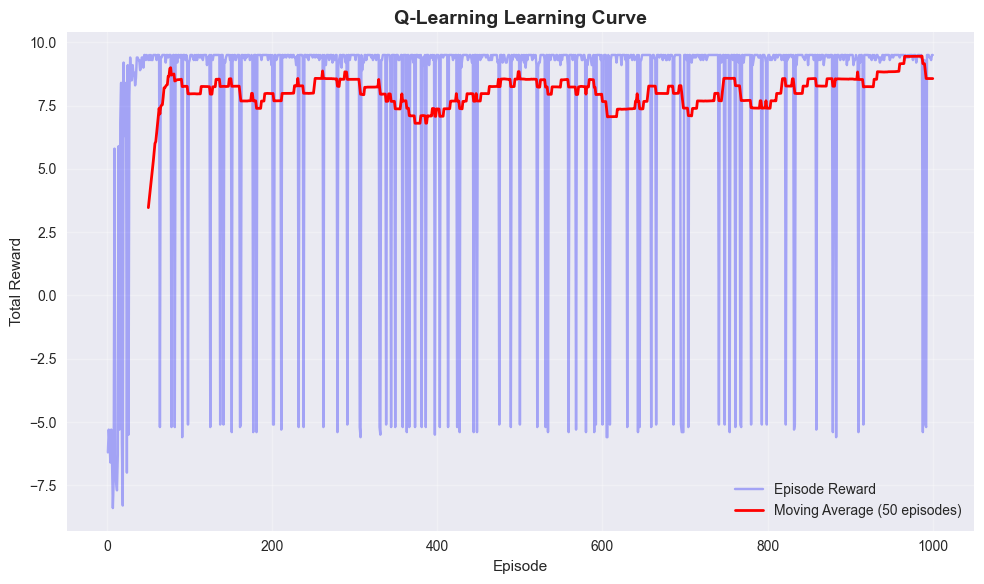

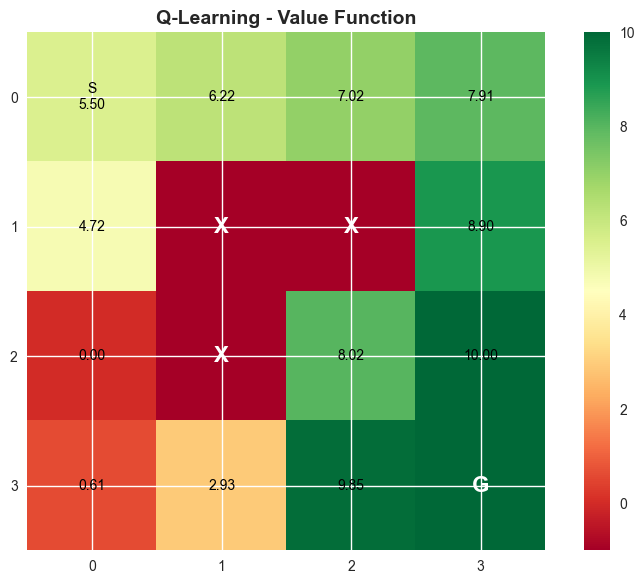

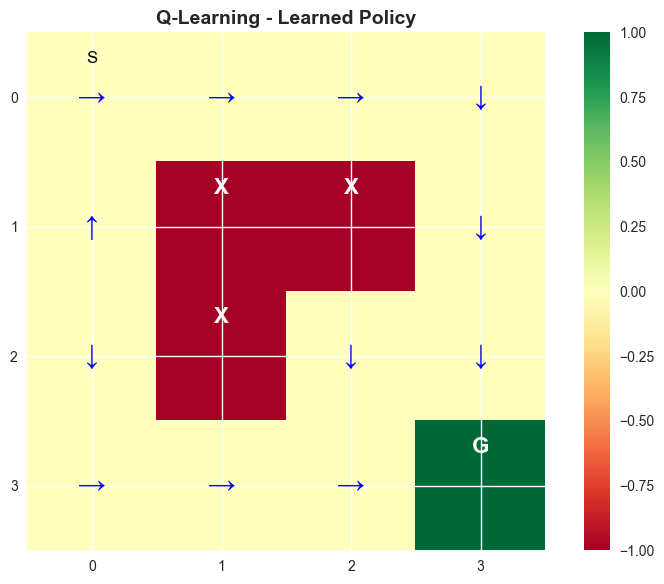

✓ Q-Learning completed - V((0, 0)) = 5.495


In [8]:
# Run Q-Learning
Q_learned, values_learned, policy_learned, _ = experiment_q_learning(
    env, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1
)
print(f"✓ Q-Learning completed - V({env.start_state}) = {values_learned[env.start_state]:.3f}")

## Part 7: Effect of Discount Factor### 7.1 Discount Factor ExperimentsLet's see how different discount factors affect the value function.

=== Experiment: Effect of Discount Factor ===

Evaluating policy with gamma = 0.1
Policy evaluation converged after 7 iterations
Value of start state (0,0): -0.179
Value of state near goal (2,2): -2.430

Evaluating policy with gamma = 0.5
Policy evaluation converged after 15 iterations
Value of start state (0,0): -0.764
Value of state near goal (2,2): -1.973

Evaluating policy with gamma = 0.9
Policy evaluation converged after 39 iterations
Value of start state (0,0): -3.141
Value of state near goal (2,2): -1.576

Evaluating policy with gamma = 0.99
Policy evaluation converged after 58 iterations
Value of start state (0,0): -4.997
Value of state near goal (2,2): -1.585


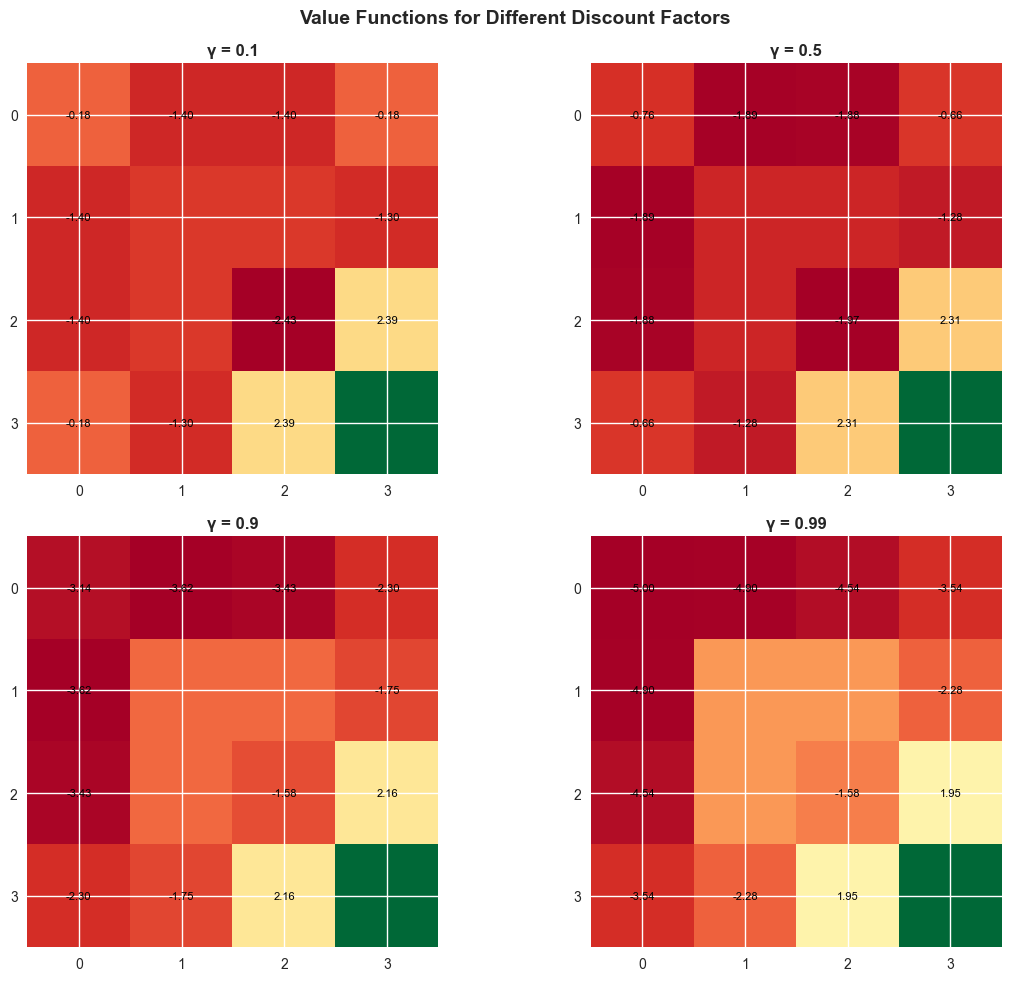

{0.1: defaultdict(float,
             {(0, 0): -0.17891807401838528,
              (1, 0): -1.399443527145084,
              (0, 1): -1.3994435271450842,
              (1, 1): 0.0,
              (0, 2): -1.3993794942903994,
              (1, 2): 0.0,
              (0, 3): -0.17635673836452403,
              (1, 3): -1.3021765390928044,
              (2, 0): -1.3993794942903992,
              (2, 3): 2.3914717191210992,
              (3, 0): -0.17635673836452403,
              (2, 1): 0.0,
              (2, 2): -2.4304264140982488,
              (3, 2): 2.3914717191210992,
              (3, 3): 0.0,
              (3, 1): -1.3021765390928044}),
 0.5: defaultdict(float,
             {(0, 0): -0.7639386989538708,
              (1, 0): -1.8918165579473054,
              (0, 1): -1.8918165579473054,
              (1, 1): 0.0,
              (0, 2): -1.8787773450183005,
              (1, 2): 0.0,
              (0, 3): -0.6596249269995034,
              (1, 3): -1.27897228535229,
              

In [9]:
experiment_discount_factors(env, random_policy, gamma_values=[0.1, 0.5, 0.9, 0.99])

## Part 8: Environment Modifications### 8.1 Testing Different EnvironmentsLet's test how the optimal policy changes with different obstacle configurations.

=== Experiment: Environment Modifications ===

Testing environment: Standard
Policy Iteration - Iteration 1
Policy evaluation converged after 39 iterations
Policy Iteration - Iteration 2
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 3
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 4
Policy evaluation converged after 7 iterations
Policy iteration converged after 4 iterations
Start state value: 5.495

Testing environment: Easy (Few Obstacles)
Policy Iteration - Iteration 1
Policy evaluation converged after 36 iterations
Policy Iteration - Iteration 2
Policy evaluation converged after 111 iterations
Policy Iteration - Iteration 3
Policy evaluation converged after 7 iterations
Policy iteration converged after 3 iterations
Start state value: 5.495

Testing environment: Hard (Many Obstacles)
Policy Iteration - Iteration 1
Policy evaluation converged after 40 iterations
Policy Iteration - Iteration 2
Policy evaluation converged af

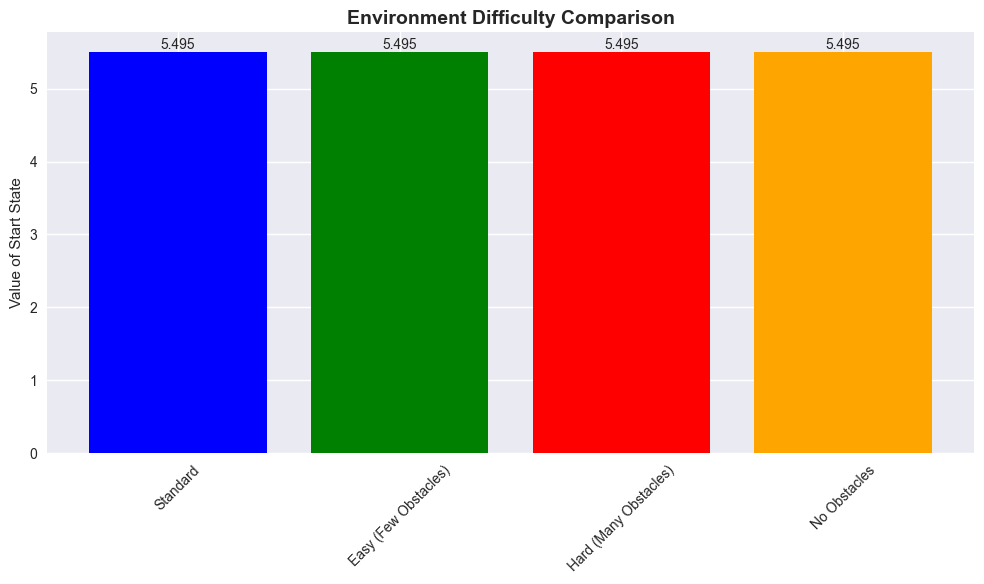

{'Standard': 5.495390000000001,
 'Easy (Few Obstacles)': 5.495390000000001,
 'Hard (Many Obstacles)': 5.495390000000001,
 'No Obstacles': 5.495390000000001}

In [10]:
experiment_environment_modifications()

## Part 9: Summary and Conclusions### 9.1 Key TakeawaysIn this exercise, we have:1. **Implemented a complete GridWorld environment** with customizable rewards and obstacles2. **Created various policy classes** including random, greedy, and custom policies3. **Implemented core RL algorithms** including policy evaluation, policy iteration, value iteration, and Q-learning4. **Built comprehensive visualization tools** for value functions, policies, and learning curves5. **Conducted systematic experiments** to understand the effects of different parameters### 9.2 What We Learned- **Value functions** quantify how good it is to be in a particular state or take a particular action- **Policy evaluation** computes the value function for a given policy- **Policy improvement** finds better policies given value functions- **Policy iteration** alternates between evaluation and improvement to find optimal policies- **Value iteration** directly computes optimal value functions- **Q-learning** can learn optimal policies through interaction with the environment- **Discount factors** control the importance of future rewards- **Environment design** significantly affects the difficulty and optimal strategies### 9.3 Next StepsThis foundation prepares us for more advanced RL topics including:- Function approximation for large state spaces- Deep reinforcement learning with neural networks- Multi-agent reinforcement learning- Real-world applications and challenges